In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [18]:
os.chdir("/Users/dmitrymikhaylov/Documents/learn/uva/spring2022/DS6001/surfing_data_pipeline/M10")

In [19]:
house = pd.read_csv('ahs_cleaned-1.csv', index_col=0)

In [20]:
house.head(1).T

,0
DIVISION,South Atlantic
TENURE,Owned or being bought by someone in your house...
YRBUILT,2000
UNITSIZE,"2,000 to 2,499 square feet"
HSHLDTYPE,Married-couple family household
HHRACE,White only
HHSEX,Male
HINCP,257000
TOTHCAMT,1642
MARKETVAL,280249


## Distributions

In [11]:
house.columns

Index(['DIVISION', 'TENURE', 'YRBUILT', 'UNITSIZE', 'HSHLDTYPE', 'HHRACE',
       'HHSEX', 'HINCP', 'TOTHCAMT', 'MARKETVAL', 'MAINTAMT', 'FUSEBLOW',
       'SEWBREAK', 'ROACH', 'RODENT', 'NOWIRE', 'PLUGS', 'COLD', 'NOTOIL',
       'NOWAT', 'FLOORHOLE', 'FNDCRUMB', 'PAINTPEEL', 'ROOFHOLE', 'ROOFSAG',
       'ROOFSHIN', 'WALLCRACK', 'WALLSIDE', 'WALLSLOPE', 'WINBOARD',
       'WINBROKE', 'LEAKI', 'MOLDBATH'],
      dtype='object')

<ipython-input-29-062826796d82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house2['logincome'] = np.log(house2.HINCP)/np.log(10)


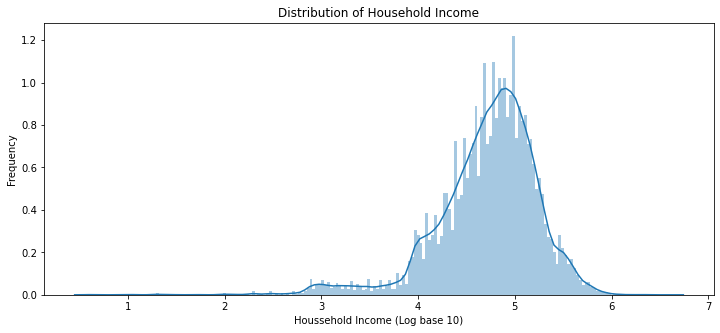

In [29]:
house2 = house.query("HINCP > 0")
# Log10 to show number of 0s on one's income
house2['logincome'] = np.log(house2.HINCP)/np.log(10)
plt.figure(figsize=(12, 5))
sns.distplot(house2.logincome, kde=True, bins=200)
plt.ylabel("Frequency")
plt.xlabel("Houssehold Income (Log base 10)")
plt.title("Distribution of Household Income")
plt.show()

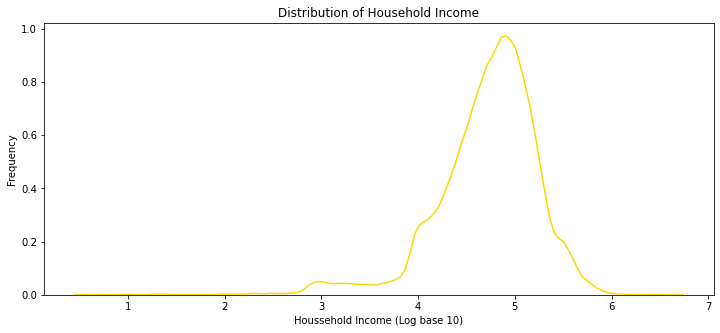

In [79]:
plt.figure(figsize=(12, 5))
sns.distplot(house2.logincome, hist=False, kde=True, bins=200, color='gold')
plt.ylabel("Frequency")
plt.xlabel("Houssehold Income (Log base 10)")
plt.title("Distribution of Household Income")
plt.show()

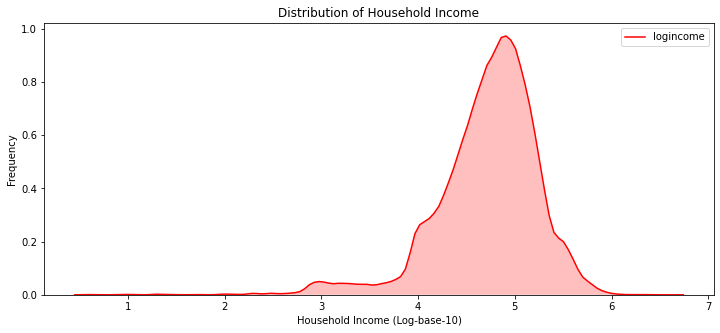

In [75]:
plt.figure(figsize=(12, 5))
sns.kdeplot(house2.logincome, shade=True, color='red')
plt.ylabel("Frequency")
plt.xlabel("Household Income (Log-base-10)")
plt.title("Distribution of Household Income")
plt.show()

In [36]:
house2.TENURE.value_counts()

Owned or being bought by someone in your household    32539
Rented                                                20110
Occupied without payment of rent                        696
Name: TENURE, dtype: int64

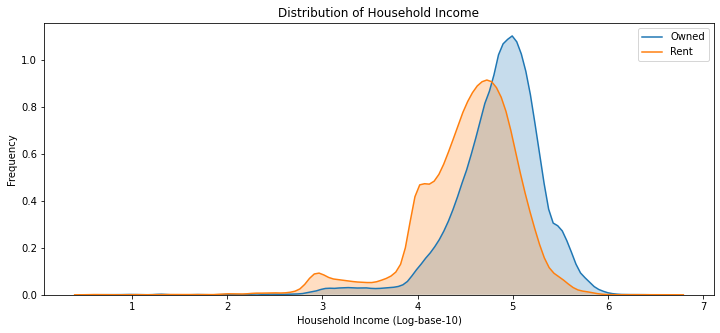

In [72]:
plt.figure(figsize=(12, 5))
sns.kdeplot(house2.query("TENURE =='Owned or being bought by someone in your household'").logincome, 
            shade=True, label='Owned')
sns.kdeplot(house2.query("TENURE =='Rented'").logincome, 
            shade=True, label='Rent')
plt.ylabel("Frequency")
plt.xlabel("Household Income (Log-base-10)")
plt.title("Distribution of Household Income")
plt.legend()
plt.show()

## Bar plot: own vs rent, broken down by race 

In [90]:
house_agg1 = house.groupby(['HHRACE', 'TENURE']).size().reset_index().rename({0:'Count'}, axis=1)

In [91]:
house_agg1

,HHRACE,TENURE,Count
0,"American Indian, Alaska Native only",Occupied without payment of rent,18
1,"American Indian, Alaska Native only",Owned or being bought by someone in your house...,274
2,"American Indian, Alaska Native only",Rented,311
3,Asian only,Occupied without payment of rent,40
4,Asian only,Owned or being bought by someone in your house...,2117
5,Asian only,Rented,1432
6,Black only,Occupied without payment of rent,118
7,Black only,Owned or being bought by someone in your house...,3177
8,Black only,Rented,4920
9,Other,Occupied without payment of rent,11


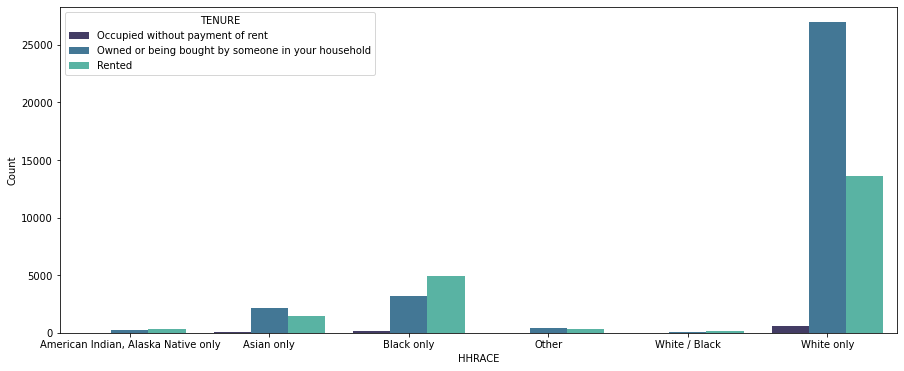

In [92]:
plt.figure(figsize=(15,6))
sns.barplot(x='HHRACE', y='Count', hue='TENURE', data=house_agg1, palette="mako")
plt.show()

In [103]:
house_agg2 = house.groupby(['HHRACE', 'TENURE']).size().reset_index().rename({0:'Total'}, axis=1)
house_agg = pd.merge(house_agg1, house_agg2, how='inner', on='HHRACE')

In [104]:
house_agg['Percent']= house_agg['Count']/house_agg['Total']

In [105]:
house_agg

,HHRACE,TENURE_x,Count,TENURE_y,Total,Percent
0,"American Indian, Alaska Native only",Occupied without payment of rent,18,Occupied without payment of rent,18,1.000000
1,"American Indian, Alaska Native only",Occupied without payment of rent,18,Owned or being bought by someone in your house...,274,0.065693
2,"American Indian, Alaska Native only",Occupied without payment of rent,18,Rented,311,0.057878
3,"American Indian, Alaska Native only",Owned or being bought by someone in your house...,274,Occupied without payment of rent,18,15.222222
4,"American Indian, Alaska Native only",Owned or being bought by someone in your house...,274,Owned or being bought by someone in your house...,274,1.000000
5,"American Indian, Alaska Native only",Owned or being bought by someone in your house...,274,Rented,311,0.881029
6,"American Indian, Alaska Native only",Rented,311,Occupied without payment of rent,18,17.277778
7,"American Indian, Alaska Native only",Rented,311,Owned or being bought by someone in your house...,274,1.135036
8,"American Indian, Alaska Native only",Rented,311,Rented,311,1.000000
9,Asian only,Occupied without payment of rent,40,Occupied without payment of rent,40,1.000000


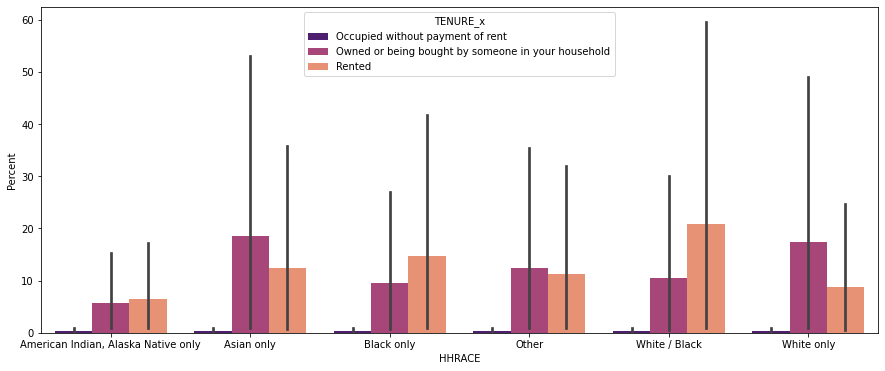

In [106]:
plt.figure(figsize=(15,6))
sns.barplot(x='HHRACE', y='Percent', hue='TENURE_x', data=house_agg, palette="magma")
plt.show()

## Box plot: income by tenure

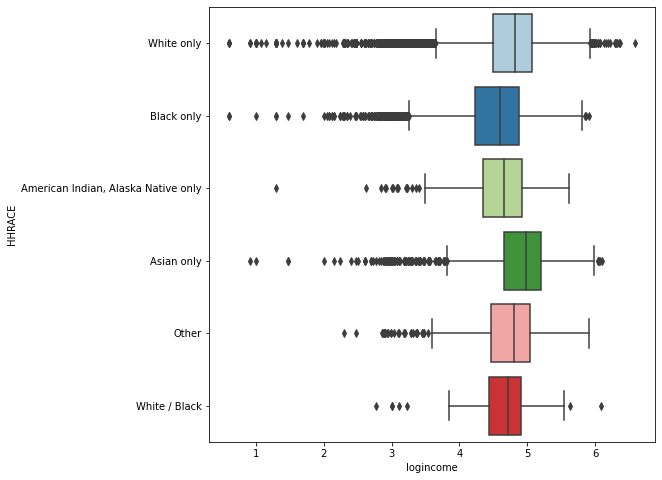

In [116]:
plt.figure(figsize=(8, 8))
sns.boxplot(y='HHRACE', x='logincome', data=house2, palette='Paired')
plt.show()